<a href="https://colab.research.google.com/github/Kofoorogun/Machine_Learning_models/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Kofoworola Orogun

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [90]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [91]:
# Load salary dataset
df = pd.read_csv("salary.csv")
df_1 = df.copy()
df_1

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [92]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [93]:
df_1.shape

(32560, 15)

In [94]:
df_1.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [95]:
# Check for missing values in the dataset
df_1.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [96]:
# Check for duplicated rows in the dataset
df_1.duplicated().sum()

24

In [97]:
# Drop duplicated rows in the dataset, leaving the first duplicate
df_2 = df_1.drop_duplicates(keep='first')

In [98]:
df_2.shape

(32536, 15)

In [99]:
df_2.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Salary'],
      dtype='object')

In [100]:
# Split data into categorical and numerical variables
num_data = df_2.select_dtypes(include=[int, float])
cat_data = df_2.select_dtypes(include=["O"])
num_data.shape, cat_data.shape

((32536, 6), (32536, 9))

In [101]:
# List of categorical data except target data- salary
cat_data_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country']
cat_data_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Country']

In [102]:
# List of categorical data except target variable- salary
cat_data_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country']

# One hot encode categorical data except target variable
OHE_df_2 = pd.get_dummies(df_2, columns= cat_data_columns, drop_first=True)
OHE_df_2.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Salary,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Country_ Cambodia,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,83311,13,0,0,13,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [103]:
# Check for correlation between one hot encoded variables
correlation = OHE_df_2.corr()
correlation

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Country_ Cambodia,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.051206,0.060861,-0.019377,-0.198300,0.102696,0.136186,0.012712,0.013997,-0.088419,-0.056081,0.041020,0.032462,0.102813,2.299021e-02,-0.016257,-0.000494,0.010445,0.075797,0.019865,0.094880,0.013274,0.060647,-0.111417,-0.011911,0.315559,0.016675,-0.534392,0.010165,0.265275,-0.042963,-0.010201,0.012318,0.099448,0.034699,-0.098554,-0.016233,-0.089689,0.016632,0.054247,0.003852,-0.032100,-0.019395,0.026860,-0.009825,-0.070091,-4.329734e-01,0.043067,0.020802,-0.011833,-0.019328,-0.034460,0.033708,0.088708,-0.001411,0.017740,0.013914,0.003520,0.028501,-0.002918,-0.004181,-0.018669,0.009925,0.000832,0.003194,0.016691,-0.018981,-0.000844,-0.002677,-0.006948,-0.008975,0.015831,-0.002017,0.002222,-0.004238,0.027257,-0.010964,-0.001101,-0.006665,-0.054623,-0.011782,0.000196,-0.007535,0.004928,0.014281,0.004235,0.008362,0.002579,0.000599,-0.013835,-0.006281,0.004839,0.015470,-0.015075,0.000369
Final_weight,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.007538,-0.002843,0.005032,0.042804,-0.024645,-0.038936,-0.010744,-0.003050,0.009433,0.010247,0.033949,0.041017,-0.001970,1.524439e-02,0.006350,-0.015660,-0.007414,-0.003315,-0.001582,-0.022367,0.017080,-0.005241,-0.005039,-0.000408,-0.026171,0.003629,0.037027,0.028466,-0.026265,0.007951,0.004041,0.008769,-0.019191,-0.032919,0.028950,0.012657,-0.003808,0.007271,-0.016535,0.016564,0.003710,0.003902,0.001253,0.007288,0.025516,1.378219e-02,0.004436,-0.016915,-0.051147,0.118155,0.006373,-0.057096,0.027113,0.000755,-0.005748,-0.004889,0.014280,0.028969,0.001014,-0.001091,0.034994,-0.003697,0.000641,-0.000283,-0.013106,0.032127,0.006706,-0.008504,0.012464,0.007652,-0.001761,-0.011176,-0.002610,-0.013330,-0.003638,0.010588,-0.001689,0.004753,0.134010,0.032109,0.002890,0.024803,-0.017546,-0.002395,-0.013158,0.007163,-0.003792,-0.012371,-0.001255,-0.001252,0.005274,-0.075013,-0.011405,0.005501
Education_num,0.036224,-0

In [104]:
from sklearn.model_selection import train_test_split, KFold, cross_validate

In [105]:
# Split data into train and test set
TARGET = "Salary"
RANDOM_STATE = 123
TEST_SIZE = 0.2

X = OHE_df_2.drop(columns=TARGET)
y = OHE_df_2[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

X_train.shape, X_test.shape

((26028, 100), (6508, 100))

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
MMS = MinMaxScaler()
X_train2 = MMS.fit_transform(X_train)
X_test2 = MMS.transform(X_test)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score

In [109]:
# Instantiate
logistic_model = LogisticRegression(max_iter=1000)

# Fit
logistic_model.fit(X_train2, y_train)

# Predict
y_pred = logistic_model.predict(X_test2)

# Probability for each salary
y_probability = logistic_model.predict_proba(X_test2)[:, 1]

In [110]:
# model evaluation using Accuracy
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8527965580823602

In [111]:
# model evaluation using Receiver Operator Characteristic; Area Under Curve
auc_score_1 = metrics.roc_auc_score(y_true=y_test, y_score=y_probability)
auc_score_1

0.9078041486824215

In [112]:
df_2["Salary"].value_counts()

 <=50K    24697
 >50K      7839
Name: Salary, dtype: int64

In [113]:
# model evaluation using Confusion matrix
labels = [0, 1]
labels = ["<=50K", ">50K"]

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[4599,  327],
       [ 631,  951]])

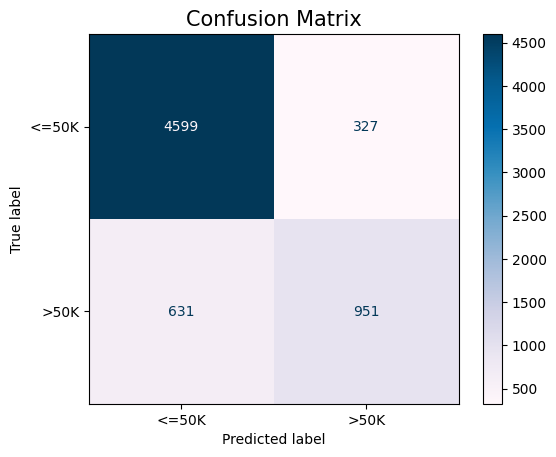

In [114]:
# Visualization of confusion matrix
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)

disp.plot(cmap="PuBu")
plt.title("Confusion Matrix", size=15)
plt.show()

In [115]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4926
        >50K       0.74      0.60      0.67      1582

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.85      0.85      6508

